In [100]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [101]:
dados = pd.read_csv('df_final.csv')
dados = dados.drop(['url','header','address','crawler','crawled_at'],axis=1)
dados = dados.rename(columns = {'rooms': 'quartos', 'bathrooms': 'banheiros', 'price':'aluguel',
                               'neighborhood':'bairro','garages':'vagas'}, inplace = False)
dados.head()

,id,area,quartos,banheiros,vagas,amenities,aluguel,condo,bairro,zona
0,2512663008,30,1,1,1,Mobiliado\nPiscina\nAcademia\nAr-condicionado\...,3500.0,2.0,Vila Madalena,Oeste
1,2518591697,98,2,2,1,Aceita animais\nPortaria 24h,2600.0,1000.0,Perdizes,Oeste
2,2518566682,126,3,2,1,Condomínio fechado\nAceita animais\nPortaria 2...,3900.0,1640.0,Jardim Paulista,Oeste
3,2519041802,78,2,2,1,Elevador\nPortaria 24h,2500.0,761.0,Vila Madalena,Oeste
4,2514428582,186,4,4,3,Piscina\nVaranda gourmet\nAcademia\nChurrasque...,7500.0,1730.0,Vila Suzana,Oeste


In [102]:
dados = dados[dados['zona'] != 'nenhuma']
dados.vagas = pd.to_numeric(dados.vagas, errors='coerce')
dados.vagas = dados.vagas.fillna(0)
dados.shape

(5084, 10)

In [103]:
dados = dados[dados['condo'] <= 10000]
dados = dados[dados['vagas'] <= 10]

In [104]:
dados.describe()

,id,area,quartos,banheiros,vagas,aluguel,condo
count,5.075000e+03,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000
mean,2.505962e+09,86.082759,2.085714,2.032512,1.379704,4009.753498,1037.736158
std,1.070119e+08,56.799409,0.897344,1.188537,0.902118,3392.723475,824.955558
min,5.109142e+07,11.000000,1.000000,1.000000,0.000000,500.000000,1.000000
25%,2.510503e+09,50.000000,1.000000,1.000000,1.000000,2100.000000,578.000000
50%,2.515432e+09,70.000000,2.000000,2.000000,1.000000,2990.000000,818.000000
75%,2.517987e+09,100.000000,3.000000,3.000000,2.000000,4500.000000,1200.000000
max,2.519594e+09,623.000000,6.000000,7.000000,10.000000,25000.000000,8450.000000


In [105]:
dados.shape

(5075, 10)

In [108]:
dados.head()

,id,area,quartos,banheiros,vagas,amenities,aluguel,condo,bairro,zona
0,2512663008,30,1,1,1.0,Mobiliado\nPiscina\nAcademia\nAr-condicionado\...,3500.0,2.0,Vila Madalena,Oeste
1,2518591697,98,2,2,1.0,Aceita animais\nPortaria 24h,2600.0,1000.0,Perdizes,Oeste
2,2518566682,126,3,2,1.0,Condomínio fechado\nAceita animais\nPortaria 2...,3900.0,1640.0,Jardim Paulista,Oeste
3,2519041802,78,2,2,1.0,Elevador\nPortaria 24h,2500.0,761.0,Vila Madalena,Oeste
4,2514428582,186,4,4,3.0,Piscina\nVaranda gourmet\nAcademia\nChurrasque...,7500.0,1730.0,Vila Suzana,Oeste


### Removendo amenities

In [69]:
dados = dados.drop(['id','amenities','bairro'],axis=1)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train, test = train_test_split(dados, test_size=0.25, random_state=1, stratify=dados['zona'])

In [72]:
train.head()

,area,quartos,banheiros,vagas,aluguel,condo,zona
4385,65,2,1,1.0,2000.0,553.0,Centro
2700,116,3,5,2.0,7000.0,880.0,Sul
1247,88,3,2,1.0,2600.0,870.0,Sul
2140,300,5,5,5.0,10500.0,2350.0,Sul
3350,240,4,4,3.0,6000.0,2900.0,Sul


In [73]:
train.shape

(3806, 7)

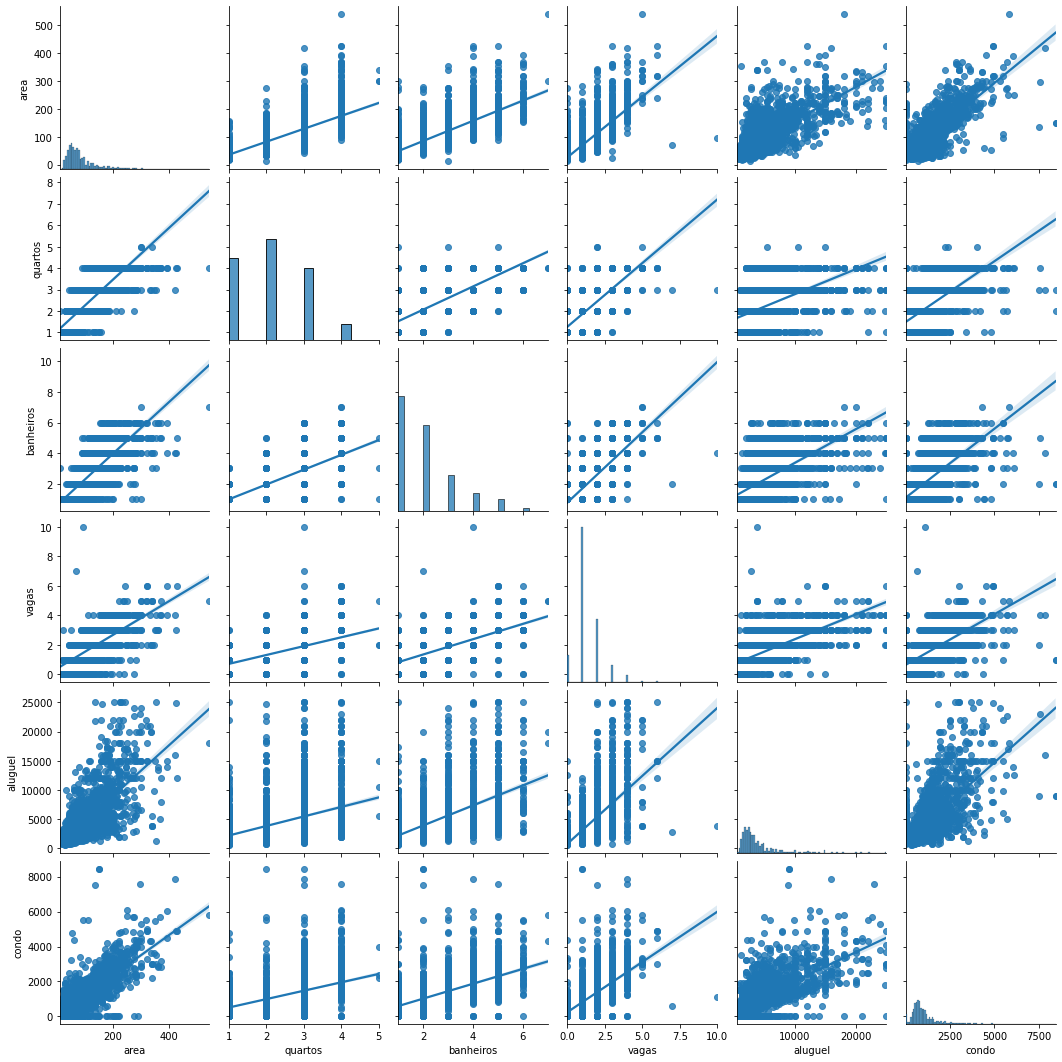

In [42]:
import seaborn as sns
sns.pairplot(train, kind='reg')

In [84]:
import numpy as np
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)
train['condo']=train['condo'].apply(np.log1p)
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)
test['condo']=test['condo'].apply(np.log1p)

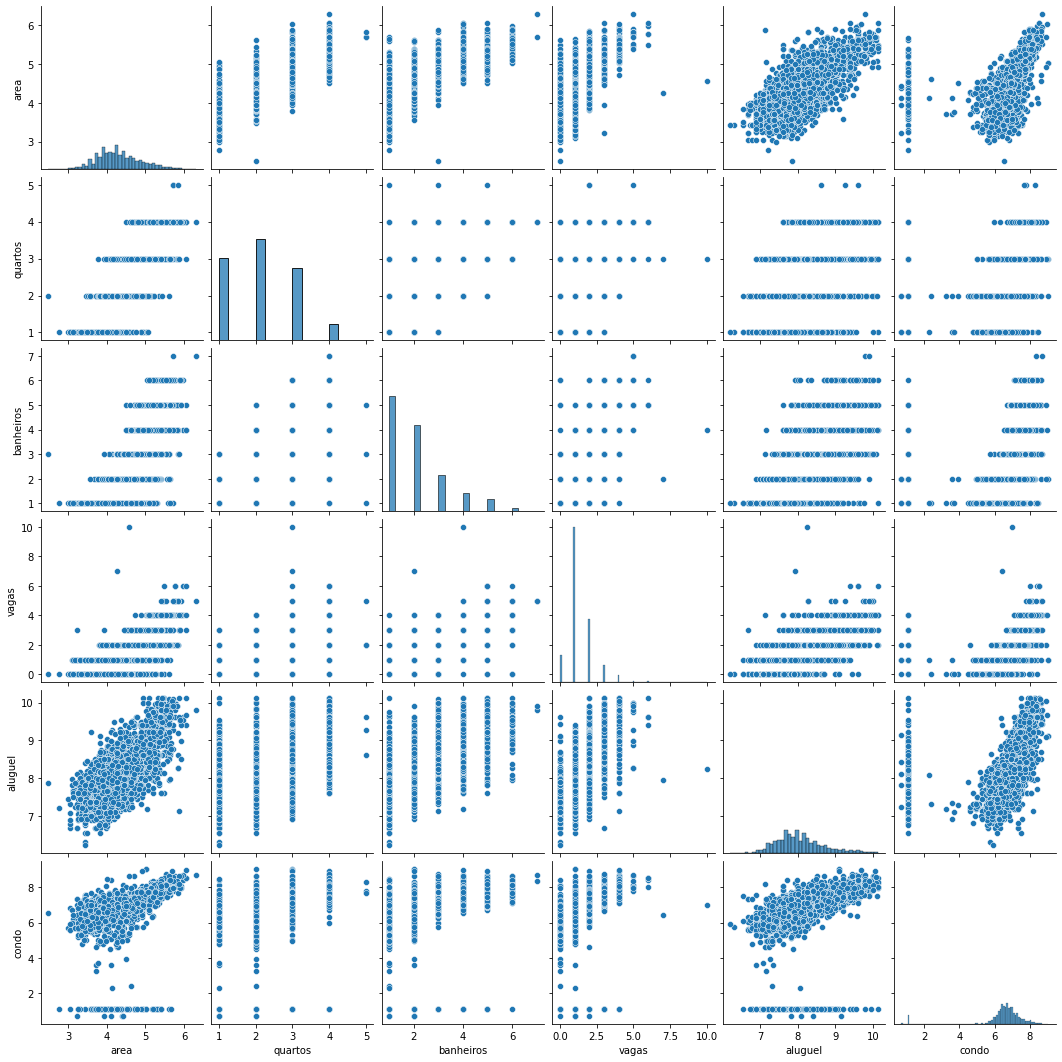

In [85]:
sns.pairplot(train)

In [86]:
X_cols=['zona', 'area', 'quartos','banheiros','vagas']
y_col=['aluguel']

In [87]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [88]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [89]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [90]:
y_pred = neigh.predict(X_test)

In [91]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test)**2))

aluguel    0.405897
dtype: float64

In [92]:
# Mean Squared Errorfrom
np.mean((y_pred-y_test)**2)

aluguel    0.164752
dtype: float64

In [93]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test))

aluguel    0.316531
dtype: float64

In [94]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5956662617327082

In [95]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.6489848179643221